In [117]:
import numpy as np
import sklearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [118]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
m = np.shape(X)[0]
n = np.shape(X)[1]

In [119]:
print (m, n)

569 30


In [120]:
X = (X - X.min()) / (X.max() - X.min())

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [122]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [123]:
def init_theta(features):
    theta = np.zeros([features, 1])
    theta0 = 0.0
    return theta, theta0

In [124]:
def sigmoid(z):
    h = 1 / (1 + np.exp(-z))
    return h

In [125]:
def forward_propagation(theta, theta0, X_train, y_train):
    z = np.dot(theta.T, X_train) + theta0
    h = sigmoid(z)
    n = X_train.shape[1]
    cost = - y_train * np.log(h) - (1 - y_train) * np.log(1 - h)
    cost = (np.sum(cost)) / n
    # backward propagation
    derivative_weight = (np.dot(X_train, ((h - y_train).T))) / n 
    derivative_bias = np.sum(h - y_train) / n
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost, gradients

In [126]:
def update(theta, theta0, X_train, y_train, alpha, epochs):
    cost_list = []
    cost_list_tenth = [] # tracking tenth cost
    index = []
    
    for i in range(epochs):
        cost, gradients = forward_propagation(theta, theta0, X_train, y_train)
        cost_list.append(cost)
        
        theta = theta - alpha * gradients["derivative_weight"]
        theta0 = theta0 - alpha * gradients["derivative_bias"]
        
        if i % 10 == 0:
            cost_list_tenth.append(cost)
            index.append(i)
            print ("Cost after epochs % i: % f" %(i, cost)) 
            
    parameters = {"weight": theta, "bias": theta0}
    plt.plot(index, cost_list_tenth)
        
    return parameters, gradients, cost_list

In [127]:
def predict(theta, theta0, X_test):
    z = sigmoid(np.dot(theta.T, X_test) + theta0)
    y_prediction = np.zeros((1, X_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1
    
    return y_prediction

In [128]:
def logistic_regression(X_train, y_train, X_test, y_test, alpha, epochs):
    m = X_train.shape[0]
    theta, theta0 = init_theta(m)
    
    parameters, gradients, cost_list = update(theta, theta0, X_train, y_train, alpha, epochs)
    
    y_prediction_test = predict(parameters["weight"], parameters["bias"], X_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], X_train)
    
    print ("Train accuracy: {}%".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print ("Test accuracy: {}%".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after epochs  0:  0.693147
Cost after epochs  10:  0.679438
Cost after epochs  20:  0.670269
Cost after epochs  30:  0.663747
Cost after epochs  40:  0.658775
Cost after epochs  50:  0.654721
Cost after epochs  60:  0.651217
Cost after epochs  70:  0.648049
Cost after epochs  80:  0.645091
Cost after epochs  90:  0.642270
Cost after epochs  100:  0.639542
Cost after epochs  110:  0.636881
Cost after epochs  120:  0.634271
Cost after epochs  130:  0.631704
Cost after epochs  140:  0.629173
Cost after epochs  150:  0.626676
Cost after epochs  160:  0.624209
Cost after epochs  170:  0.621772
Cost after epochs  180:  0.619364
Cost after epochs  190:  0.616983
Cost after epochs  200:  0.614629
Cost after epochs  210:  0.612302
Cost after epochs  220:  0.610002
Cost after epochs  230:  0.607727
Cost after epochs  240:  0.605479
Cost after epochs  250:  0.603255
Cost after epochs  260:  0.601057
Cost after epochs  270:  0.598883
Cost after epochs  280:  0.596733
Cost after epochs  290:  

Cost after epochs  2510:  0.391775
Cost after epochs  2520:  0.391381
Cost after epochs  2530:  0.390989
Cost after epochs  2540:  0.390599
Cost after epochs  2550:  0.390211
Cost after epochs  2560:  0.389824
Cost after epochs  2570:  0.389440
Cost after epochs  2580:  0.389058
Cost after epochs  2590:  0.388677
Cost after epochs  2600:  0.388298
Cost after epochs  2610:  0.387921
Cost after epochs  2620:  0.387546
Cost after epochs  2630:  0.387173
Cost after epochs  2640:  0.386802
Cost after epochs  2650:  0.386432
Cost after epochs  2660:  0.386064
Cost after epochs  2670:  0.385698
Cost after epochs  2680:  0.385334
Cost after epochs  2690:  0.384971
Cost after epochs  2700:  0.384610
Cost after epochs  2710:  0.384251
Cost after epochs  2720:  0.383894
Cost after epochs  2730:  0.383538
Cost after epochs  2740:  0.383184
Cost after epochs  2750:  0.382832
Cost after epochs  2760:  0.382481
Cost after epochs  2770:  0.382132
Cost after epochs  2780:  0.381784
Cost after epochs  2

Cost after epochs  5070:  0.329820
Cost after epochs  5080:  0.329671
Cost after epochs  5090:  0.329522
Cost after epochs  5100:  0.329374
Cost after epochs  5110:  0.329226
Cost after epochs  5120:  0.329078
Cost after epochs  5130:  0.328931
Cost after epochs  5140:  0.328785
Cost after epochs  5150:  0.328639
Cost after epochs  5160:  0.328493
Cost after epochs  5170:  0.328347
Cost after epochs  5180:  0.328203
Cost after epochs  5190:  0.328058
Cost after epochs  5200:  0.327914
Cost after epochs  5210:  0.327770
Cost after epochs  5220:  0.327627
Cost after epochs  5230:  0.327484
Cost after epochs  5240:  0.327342
Cost after epochs  5250:  0.327200
Cost after epochs  5260:  0.327058
Cost after epochs  5270:  0.326917
Cost after epochs  5280:  0.326777
Cost after epochs  5290:  0.326636
Cost after epochs  5300:  0.326496
Cost after epochs  5310:  0.326357
Cost after epochs  5320:  0.326217
Cost after epochs  5330:  0.326079
Cost after epochs  5340:  0.325940
Cost after epochs  5

Cost after epochs  7430:  0.303589
Cost after epochs  7440:  0.303506
Cost after epochs  7450:  0.303424
Cost after epochs  7460:  0.303341
Cost after epochs  7470:  0.303259
Cost after epochs  7480:  0.303177
Cost after epochs  7490:  0.303095
Cost after epochs  7500:  0.303013
Cost after epochs  7510:  0.302931
Cost after epochs  7520:  0.302850
Cost after epochs  7530:  0.302769
Cost after epochs  7540:  0.302687
Cost after epochs  7550:  0.302607
Cost after epochs  7560:  0.302526
Cost after epochs  7570:  0.302445
Cost after epochs  7580:  0.302365
Cost after epochs  7590:  0.302285
Cost after epochs  7600:  0.302204
Cost after epochs  7610:  0.302125
Cost after epochs  7620:  0.302045
Cost after epochs  7630:  0.301965
Cost after epochs  7640:  0.301886
Cost after epochs  7650:  0.301807
Cost after epochs  7660:  0.301727
Cost after epochs  7670:  0.301649
Cost after epochs  7680:  0.301570
Cost after epochs  7690:  0.301491
Cost after epochs  7700:  0.301413
Cost after epochs  7

Cost after epochs  9790:  0.287934
Cost after epochs  9800:  0.287881
Cost after epochs  9810:  0.287828
Cost after epochs  9820:  0.287775
Cost after epochs  9830:  0.287723
Cost after epochs  9840:  0.287670
Cost after epochs  9850:  0.287617
Cost after epochs  9860:  0.287565
Cost after epochs  9870:  0.287512
Cost after epochs  9880:  0.287460
Cost after epochs  9890:  0.287407
Cost after epochs  9900:  0.287355
Cost after epochs  9910:  0.287303
Cost after epochs  9920:  0.287251
Cost after epochs  9930:  0.287199
Cost after epochs  9940:  0.287147
Cost after epochs  9950:  0.287096
Cost after epochs  9960:  0.287044
Cost after epochs  9970:  0.286992
Cost after epochs  9980:  0.286941
Cost after epochs  9990:  0.286889
Train accuracy: 88.81987577639751%
Test accuracy: 93.02325581395348%


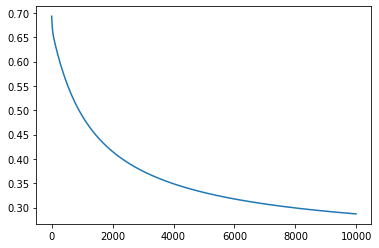

In [129]:
logistic_regression(X_train, y_train, X_test, y_test, alpha = 0.1, epochs = 10000)